# Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

sns.set_style("dark")
sns.set_palette("bright", 10)

# Read in data

In [2]:
df = pd.read_csv('data.csv')
df = df.sort_values(by='date')  # make sure the date column is in asscending order
df.head()

,date,day.of.week,car.count,weather,cloud.indicator
0,2010-01-01,Friday,101,0.1,clear
1,2010-01-02,Saturday,34,0.2,cloudy
2,2010-01-03,Sunday,113,0.4,clear
3,2010-01-04,Monday,5,0.6,cloudy
4,2010-01-05,Tuesday,124,0.1,clear


# check if any null within the dataframe

In [3]:
for i in range(df.shape[1]):
    if df.iloc[i].isnull().sum()==0:
        print('There is no null value in ', df.columns[i])
    else:
        print('There is null value in ', df.columns[i])

There is no null value in  date
There is no null value in  day.of.week
There is no null value in  car.count
There is no null value in  weather
There is no null value in  cloud.indicator


# Feature Engineering

In [4]:
# create new column indicate the year and month of each row
df['year'] = pd.DatetimeIndex(df['date']).year
df['month'] = pd.DatetimeIndex(df['date']).month

df.head()

,date,day.of.week,car.count,weather,cloud.indicator,year,month
0,2010-01-01,Friday,101,0.1,clear,2010,1
1,2010-01-02,Saturday,34,0.2,cloudy,2010,1
2,2010-01-03,Sunday,113,0.4,clear,2010,1
3,2010-01-04,Monday,5,0.6,cloudy,2010,1
4,2010-01-05,Tuesday,124,0.1,clear,2010,1


In [5]:
# convert the string day of week to numeric number
weekdays = {
    'Monday':1,
    'Tuesday':2,
    'Wednesday':3,
    'Thursday':4,
    'Friday':5,
    'Saturday':6,
    'Sunday':7
}

df['day.of.week'] = df['day.of.week'].map(lambda x: weekdays[x])
df.head()

,date,day.of.week,car.count,weather,cloud.indicator,year,month
0,2010-01-01,5,101,0.1,clear,2010,1
1,2010-01-02,6,34,0.2,cloudy,2010,1
2,2010-01-03,7,113,0.4,clear,2010,1
3,2010-01-04,1,5,0.6,cloudy,2010,1
4,2010-01-05,2,124,0.1,clear,2010,1


In [6]:
# use label encoder to conver the categorical data to numerica label
df['cloud.indicator'] = df['cloud.indicator'].map(lambda x: 1 if x=='clear' else 0)

df.head()

,date,day.of.week,car.count,weather,cloud.indicator,year,month
0,2010-01-01,5,101,0.1,1,2010,1
1,2010-01-02,6,34,0.2,0,2010,1
2,2010-01-03,7,113,0.4,1,2010,1
3,2010-01-04,1,5,0.6,0,2010,1
4,2010-01-05,2,124,0.1,1,2010,1


# Exploratory data analysis

### visualize the year factor which affects the car count

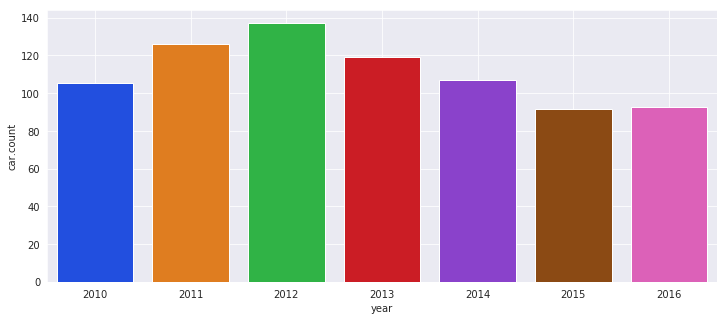

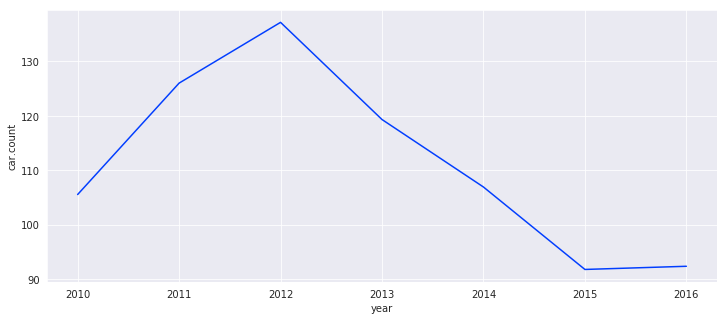

In [7]:
# plot the average car count in each year ---> shows the max car count in year 2012, min in year 2015
plt.figure(figsize=(12,5))
sns.barplot(x=df.groupby(['year']).mean()['car.count'].index, y=df.groupby(['year']).mean()['car.count'])
plt.grid(True)
plt.show()

plt.figure(figsize=(12,5))
plt.plot(df.groupby(['year']).mean()['car.count'])
plt.xlabel('year')
plt.ylabel('car.count')
plt.grid(True)
plt.show()

plots show that most number of cars occurs in year 2012, fewest year is in year 2015

### visualize the month factor which affects the car count

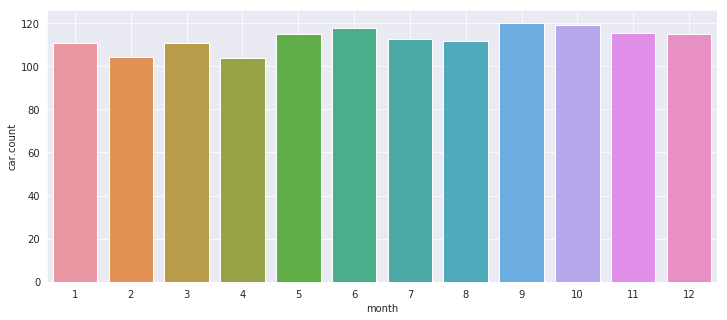

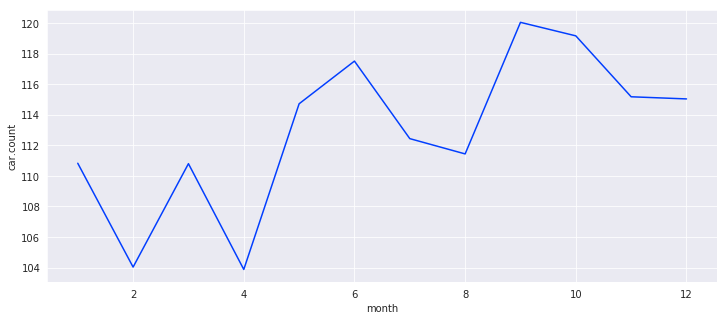

In [8]:
# plot the average car count in each month ---> shows the max car count in September, min in April
plt.figure(figsize=(12,5))
sns.barplot(x=df.groupby(['month']).mean()['car.count'].index, y=df.groupby(['month']).mean()['car.count'])
plt.grid(True)
plt.show()

plt.figure(figsize=(12,5))
plt.plot(df.groupby(['month']).mean()['car.count'])
plt.xlabel('month')
plt.ylabel('car.count')
plt.grid(True)
plt.show()

Summer time is the popular months--May to October 

### visualize the day of week factor which affects the car count

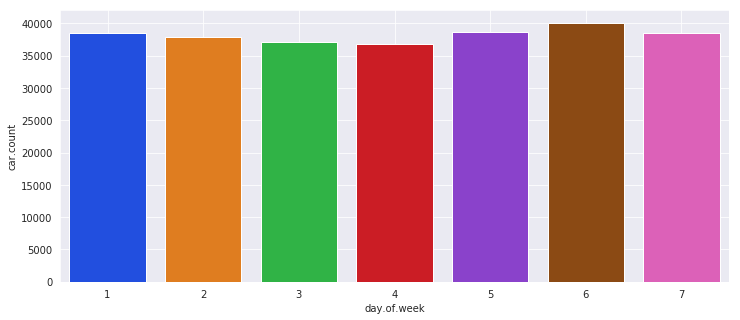

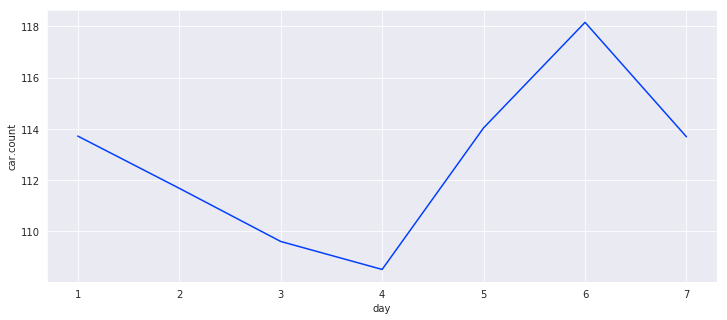

In [9]:
# plot the average car count in each day in week ---> shows the max car count in Saturday, min in Tursday
plt.figure(figsize=(12,5))
sns.barplot(x=df.groupby(['day.of.week']).sum()['car.count'].index, y=df.groupby(['day.of.week']).sum()['car.count'])
plt.grid(True)
plt.show()

plt.figure(figsize=(12,5))
plt.plot(df.groupby(['day.of.week']).mean()['car.count'])
plt.xlabel('day')
plt.ylabel('car.count')
plt.grid(True)
plt.show()

Saturday always has the most number of car, Thursday is the day with fewest car

### correlation heatmap

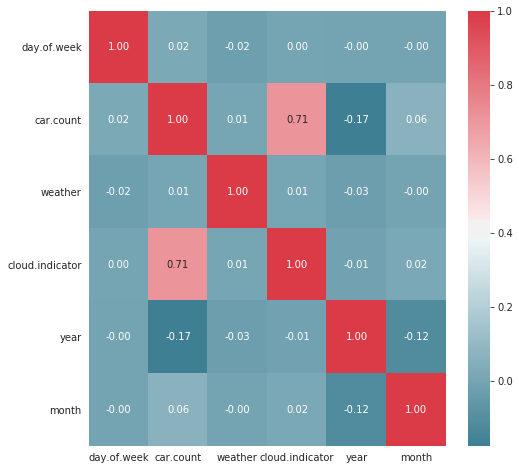

In [10]:
# create Correlation df
corr = df.corr(method='pearson')
# plot figsize
fig, ax = plt.subplots(figsize=(8, 8))

# generate Color Map, red & blue
colormap = sns.diverging_palette(220, 10, as_cmap=True)
# generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")

# show plot
plt.show()

Cloud situation is mostly positively correlated to car count

### visualize the cloud situation effects on month, year by year

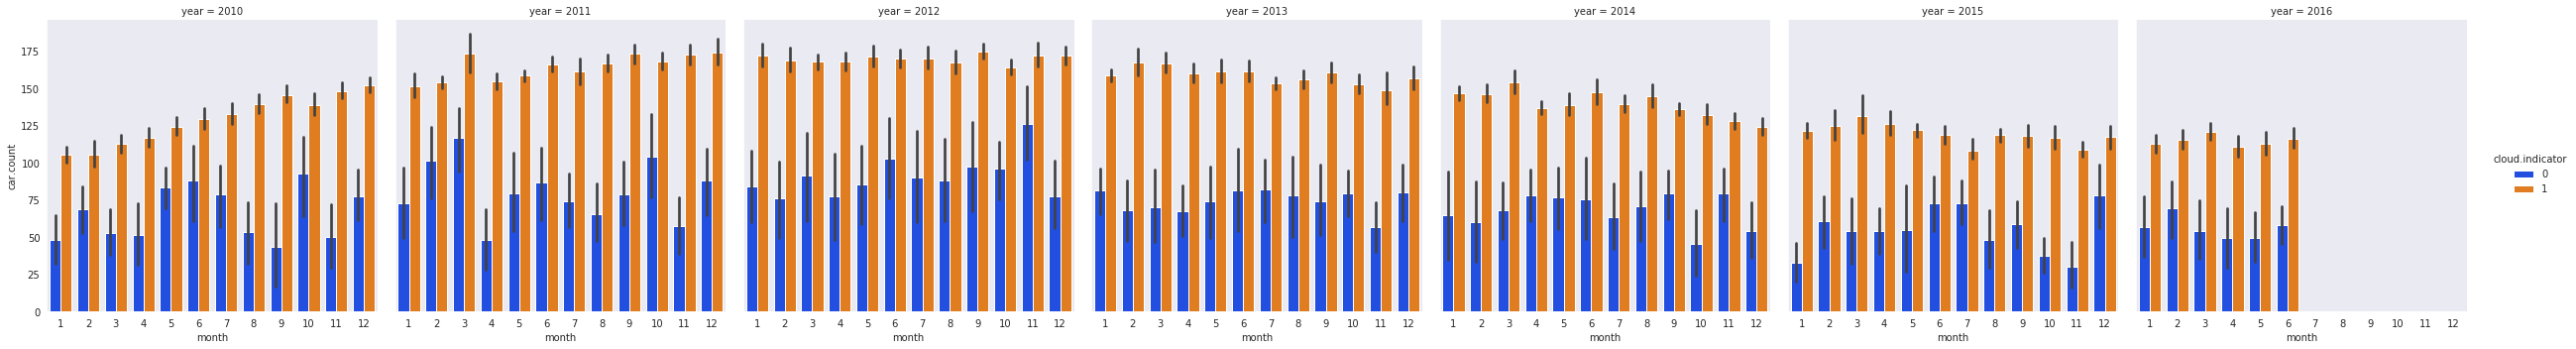

In [11]:
# detail lookup the car count in clear and cloudy cloud.indicator by month
sns.catplot(x='month', y='car.count', hue='cloud.indicator', 
            col='year', data=df, kind="bar")
plt.show()

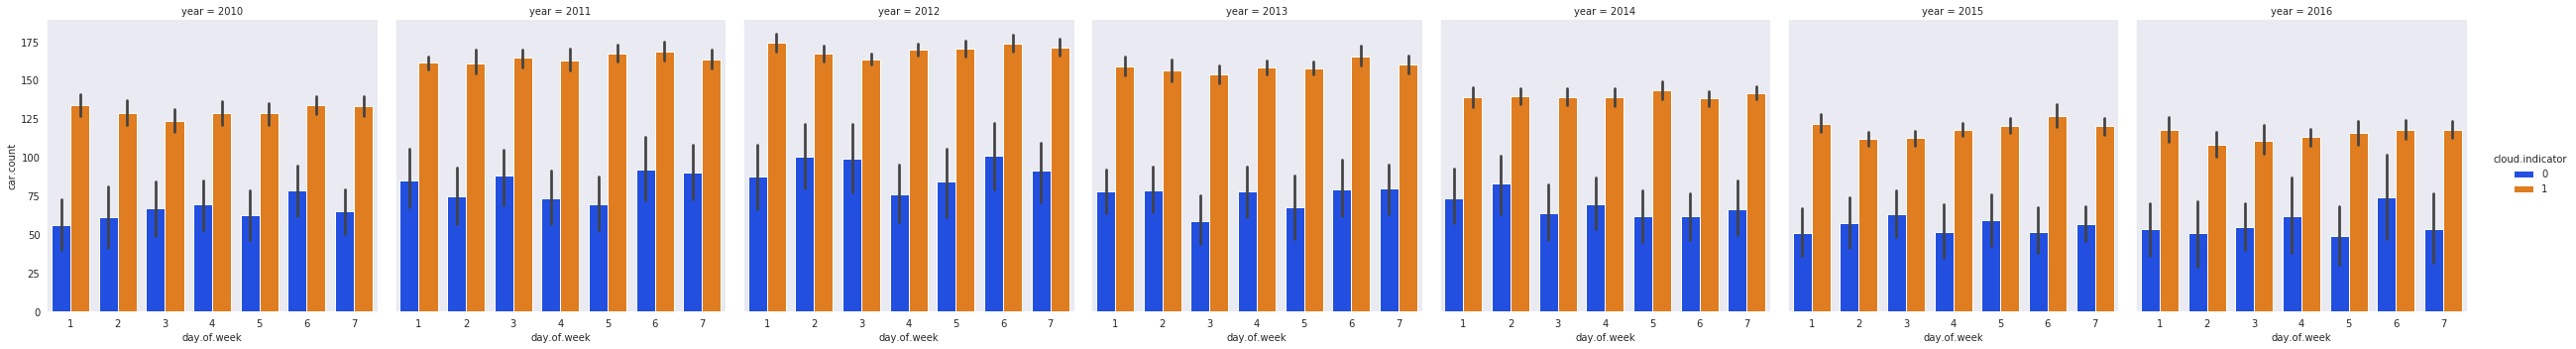

In [12]:
# detail lookup the car count in clear and cloudy cloud.indicator by day of week
sns.catplot(x='day.of.week', y='car.count', hue='cloud.indicator', 
            col='year', data=df, kind="bar")
plt.show()

In [13]:
dff = df

# SVR regression model to predict the car.count

In [14]:
df = df[['day.of.week', 'weather', 'cloud.indicator', 'car.count']]
df.head()

,day.of.week,weather,cloud.indicator,car.count
0,5,0.1,1,101
1,6,0.2,0,34
2,7,0.4,1,113
3,1,0.6,0,5
4,2,0.1,1,124


In [15]:
# set X be the feature matrix, y be the response(predictor) vector
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

In [16]:
from sklearn.preprocessing import MinMaxScaler
sc_X = MinMaxScaler()
sc_y = MinMaxScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform([[i] for i in y])
y = [i for j in y for i in j] 

In [17]:
train_idx = int(len(df) * .85)

In [18]:
X_train, y_train, X_test, y_test = X[:train_idx], y[:train_idx], X[train_idx:], y[train_idx:]

In [19]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)

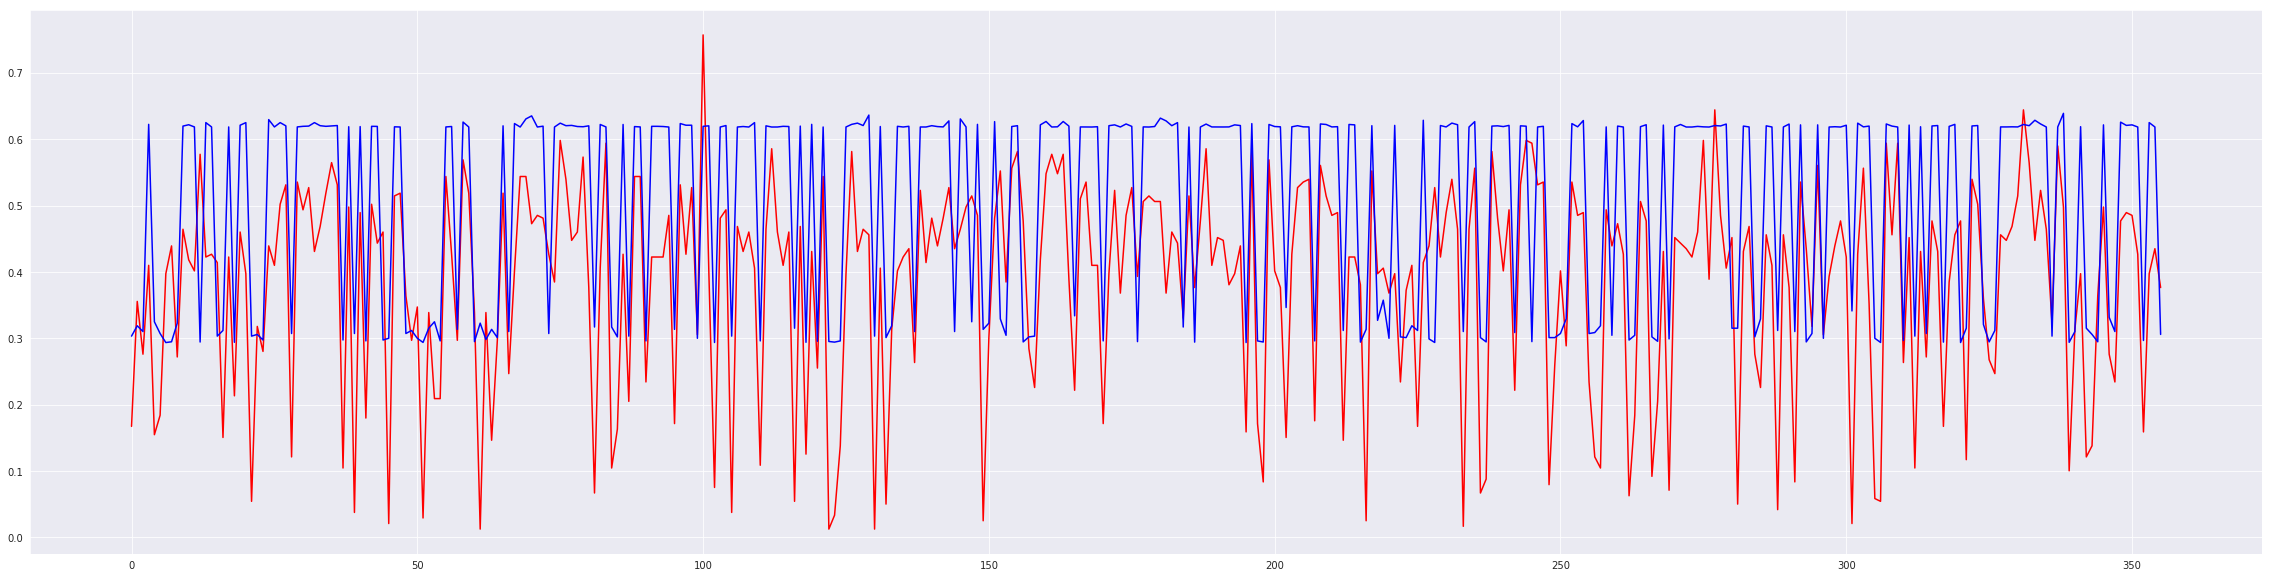

In [20]:
# Visualising the SVR results
plt.figure(figsize=(40,10))
plt.plot(y_test, color = 'red')
plt.plot(svr.predict(X_test), color = 'blue')
plt.grid(True)
plt.show()

In [21]:
# print out the mean square error between actual and predicted values
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, svr.predict(X_test))

0.02492335819190767

this model prediction seems mostly greater than the actual value, so I believe it's great for predict the max car.count for future days

# Random Forest Regression model to predict car.count

In [22]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 500, random_state = 42)
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

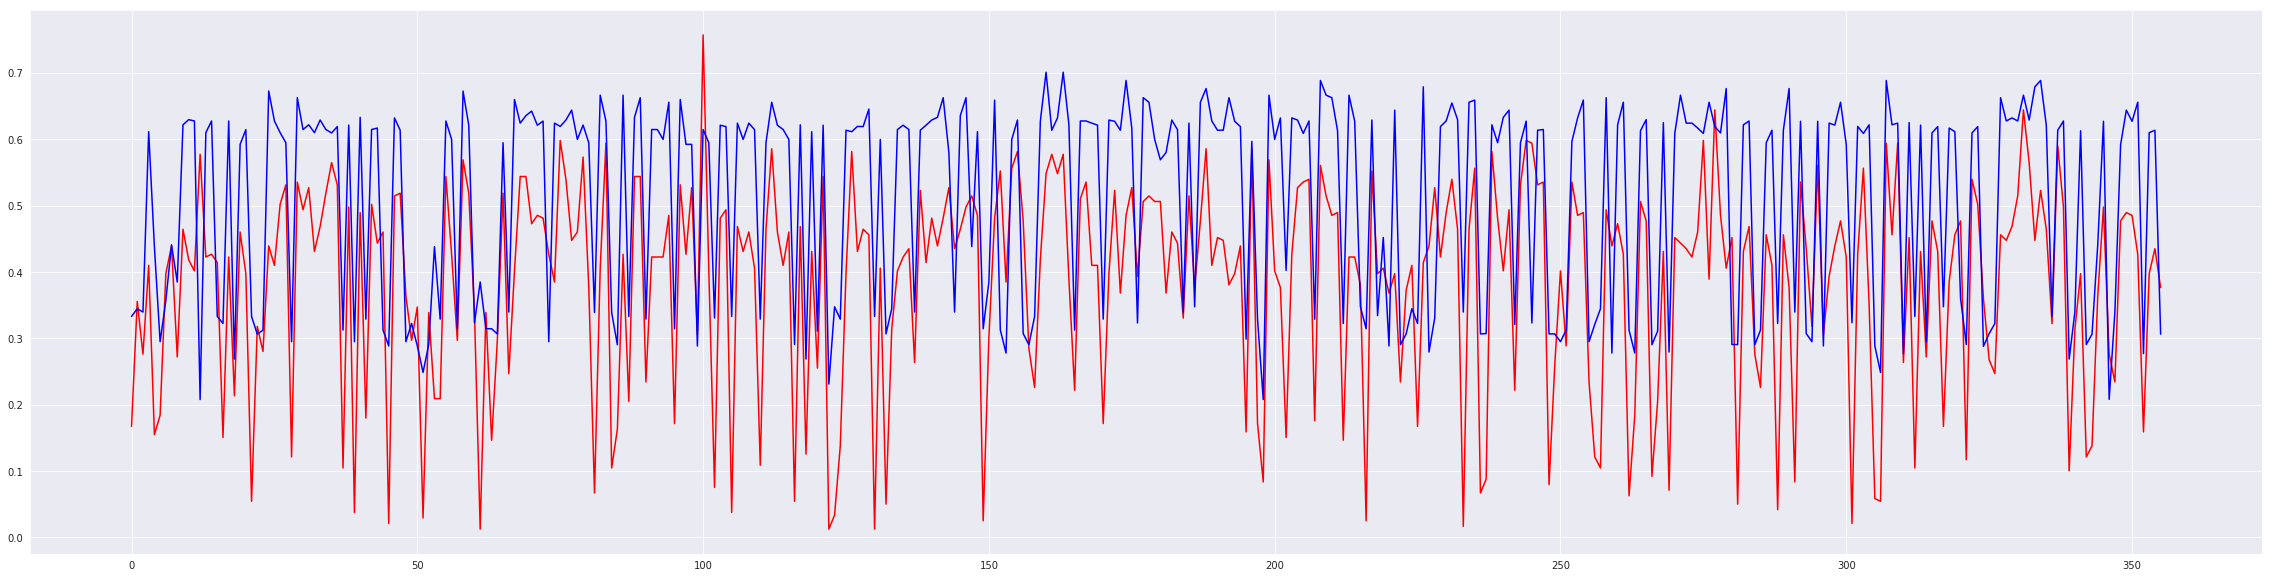

In [23]:
# Visualising the SVR results
plt.figure(figsize=(40,10))

plt.plot(y_test, color = 'red')
plt.plot(y_pred, color = 'blue')
plt.grid(True)
plt.show()

In [24]:
# print out the mean square error between actual and predicted values
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, svr.predict(X_test))

0.02492335819190767

this model prediction seems mostly greater than the actual value, so I believe it's great for predict the max car.count for future days

# ARIMA model to predicting the car.count

In [25]:
df = pd.read_csv('data.csv')
df = df[['date', 'car.count']]
df = df[['car.count']]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df.head()

,car.count
0,0.422594
1,0.142259
2,0.472803
3,0.020921
4,0.518828


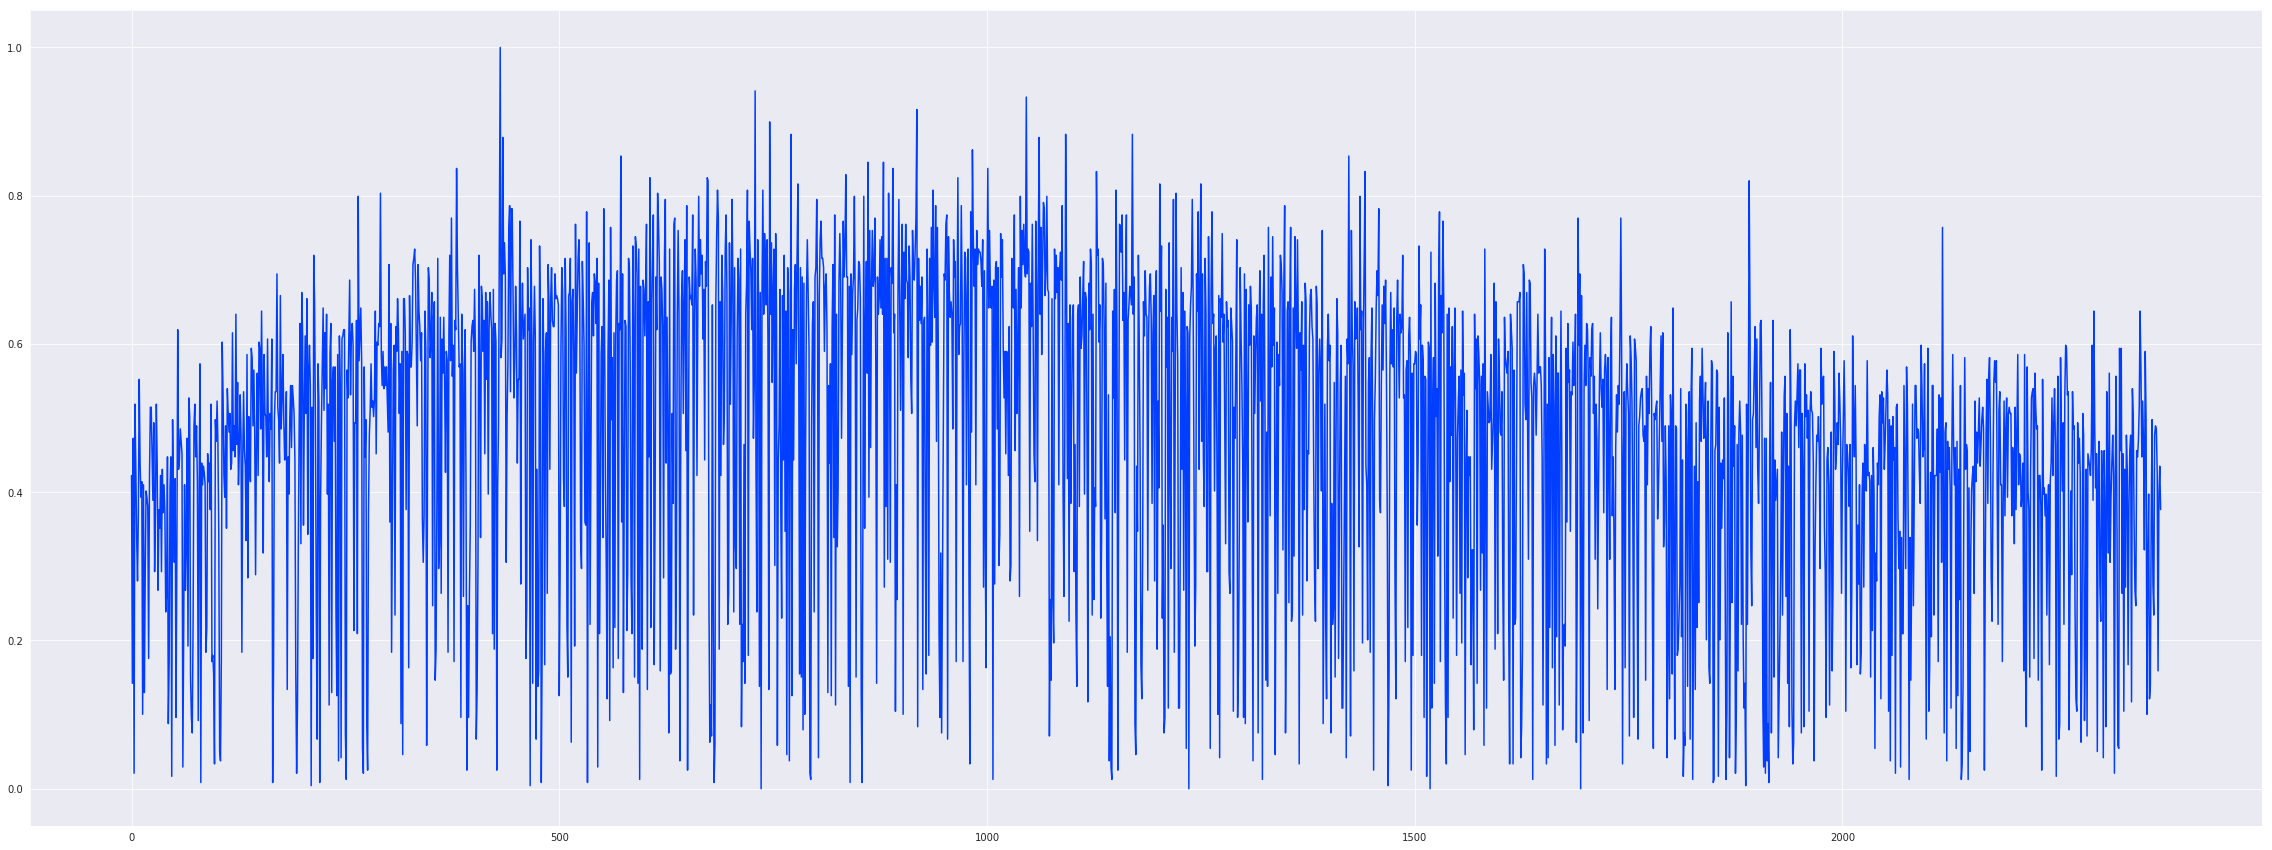

In [26]:
plt.figure(figsize=(40,15))
plt.grid(True)
plt.plot(df['car.count'].tolist())

In [27]:
# Check stationarity
from statsmodels.tsa.stattools import adfuller

X = df['car.count'].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.400166
p-value: 0.000297
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


since the ADF statistic is less than the critical value ==> reject the null hypothesis,say that the series is stationary!

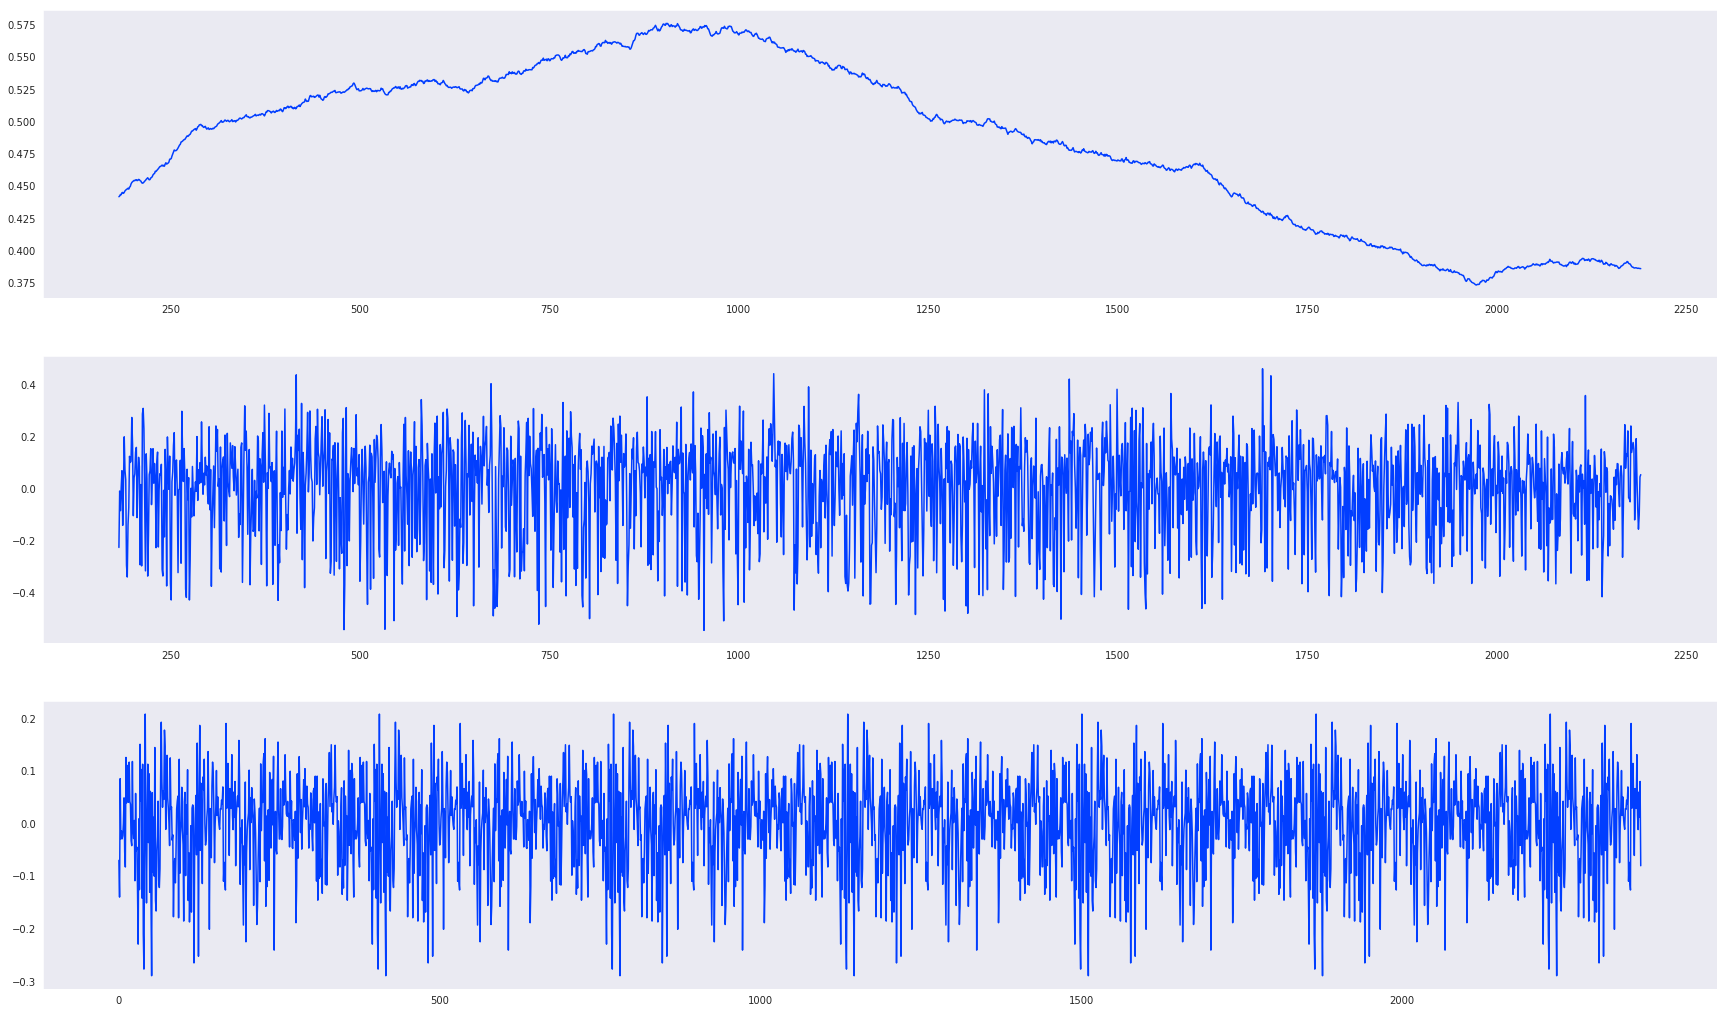

In [28]:
# visualize the seasonal decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
res = seasonal_decompose(df['car.count'].values, freq=365)

fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(30,18))
ax1.plot(res.trend)
ax2.plot(res.resid)
ax3.plot(res.seasonal)

the data is sationarity, seasonal, and it is good to form ARIMA model

In [29]:
import statsmodels.api as sm
mod = sm.tsa.statespace.SARIMAX(X,order=(3,2,0),
                                seasonal_order=(3,0,3,4),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print('ARIMA{}x{} - AIC:{}'.format((0,2,1), (0,2,1,12), results.aic))

/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 2, 1)x(0, 2, 1, 12) - AIC:586.833697671251


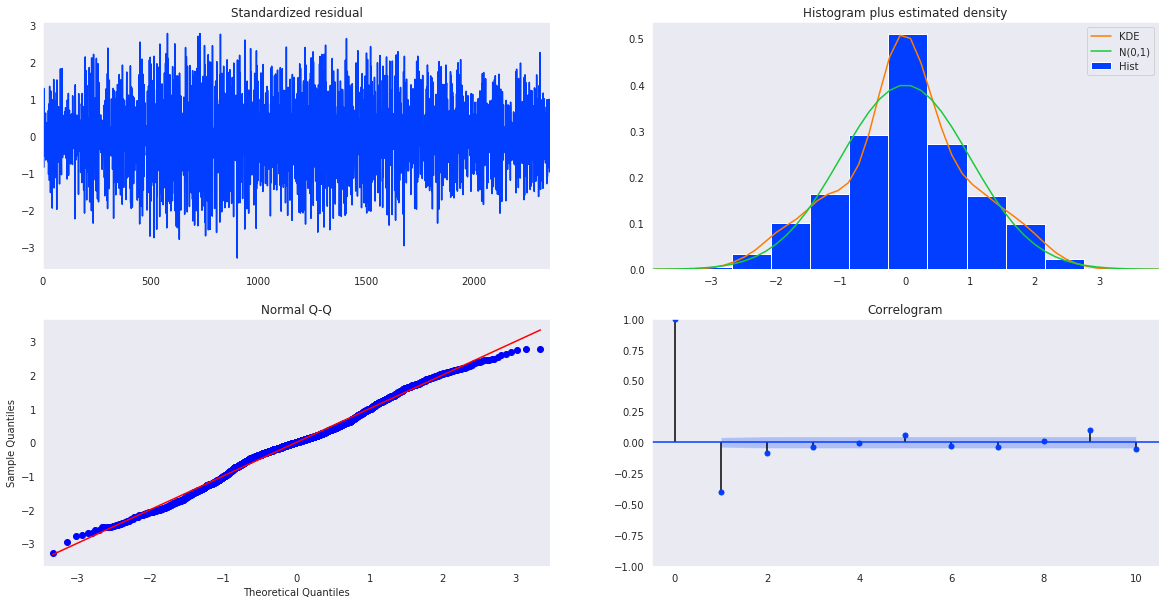

In [30]:
results.plot_diagnostics(figsize=(20, 10))
plt.show()

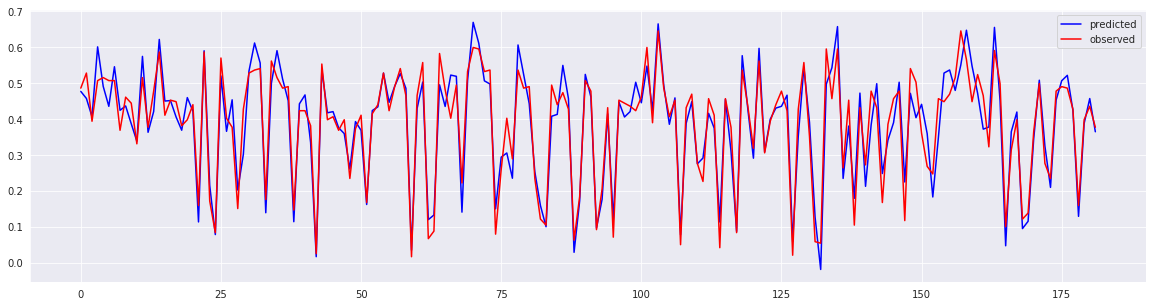

In [31]:
# try the model to predict the 2016-1-1 to 2016-6-30 car count, and compare with the actual value
pred = results.get_prediction(start = 2192, end = 2373, dynamic=False)
pred_ci = pred.conf_int()

plt.figure(figsize=(20,5))
plt.grid(True)
plt.plot(pred.predicted_mean, color='blue', label='predicted')
plt.plot(df.iloc[2191:2373, :].values, color='red', label='observed')
plt.legend()
plt.show()

In [32]:
# print out the mean square error
from sklearn.metrics import mean_squared_error
mean_squared_error(df.iloc[2191:2373, :].values, pred.predicted_mean)

0.0025080627939369176

# Keras Model of binary classification 
### use the features of day.of.week, weather, and car.count to predict the cloud.indicator

In [33]:
df = dff[[ 'day.of.week', 'weather', 'car.count', 'cloud.indicator']]
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df['cloud.indicator'] = df['cloud.indicator'].astype(int)

# set X be the feature matrix, y be the response(predictor) vector
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [34]:
df.head()

,day.of.week,weather,car.count,cloud.indicator
0,0.666667,0.440000,0.422594,1
1,0.833333,0.453333,0.142259,0
2,1.000000,0.480000,0.472803,1
3,0.000000,0.506667,0.020921,0
4,0.166667,0.440000,0.518828,1


In [35]:
# split the dataset into 80% training set, and 20% for testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [36]:
# balance the dataset
from imblearn.over_sampling import SMOTE
smote = SMOTE(kind = "regular")

X_train, y_train = smote.fit_sample(X_train, y_train)

In [37]:
#importing the keras libraries and keras
import keras
from keras.models import Sequential
from keras.callbacks import BaseLogger, ModelCheckpoint, EarlyStopping, TensorBoard, ReduceLROnPlateau
from keras.layers import Dense, Activation, Flatten

model = Sequential()

model.add(Dense(units= 100, kernel_initializer ='glorot_uniform', bias_initializer ='glorot_uniform',
                activation = 'relu', input_dim = X.shape[1]))

# add hidden layers
for i in range(4):
    model.add(Dense(units= 120, kernel_initializer ='glorot_uniform', bias_initializer ='glorot_uniform', 
                    activation = 'relu'))
    
# Adding the output layer
model.add(Dense(units = 2, kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform', 
                activation ='sigmoid'))

baselogger = BaseLogger()

checkpointer = ModelCheckpoint(filepath ='weights.{epoch:02d}-{val_loss:.2f}.hdf5', monitor ='val_acc', verbose = 1, 
                               save_best_only = False, save_weights_only = False, mode ='max', period = 1)

earlystopper = EarlyStopping(monitor ='val_acc', min_delta = 0, patience = 5, verbose = 1, mode ='max')

tensor_board = TensorBoard(log_dir ='./logs', histogram_freq = 0, batch_size = 10, write_graph = True, write_grads = True, 
                           write_images = True, embeddings_freq = 0, embeddings_layer_names = None, 
                           embeddings_metadata = None)

reduced_lr = ReduceLROnPlateau(monitor ='val_loss', factor = 0.25, patience = 1, verbose = 1, mode ='min', 
                               cooldown = 0, min_lr = 0)

callbacks_list = [baselogger, checkpointer, earlystopper, tensor_board, reduced_lr]

model.compile(optimizer ='adam' , loss ='sparse_categorical_crossentropy', metrics = ['accuracy'])

history = model.fit(X_train, y_train, validation_split = 0.33,
                   batch_size = 100, epochs = 10, 
                   verbose = 1, shuffle = True, 
                   validation_data = (X_test, y_test), 
                   callbacks = callbacks_list)
print(history)

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Train on 2146 samples, validate on 475 samples
Epoch 1/10
2146/2146 [==============================] - 0s 142us/step - loss: 0.6819 - acc: 0.5615 - val_loss: 0.6438 - val_acc: 0.8021

Epoch 00001: saving model to weights.01-0.64.hdf5
Epoch 2/10
2146/2146 [==============================] - 0s 40us/step - loss: 0.5461 - acc: 0.7829 - val_loss: 0.4343 - val_acc: 0.8295

Epoch 00002: saving model to weights.02-0.43.hdf5
Epoch 3/10
2146/2146 [==============================] - 0s 32us/step - loss: 0.3788 - acc: 0.8243 - val_loss: 0.3928 - val_acc: 0.8168

Epoch 00003: saving model to weights.03-0.39.hdf5
Epoch 4/10
2146/2146 [==============================] - 0s 40us/step - loss: 0.3627 - acc: 0.8239 - val_loss: 0.3858 - val_acc: 0.8147

Epoch 00004: saving model to weights.04-0.39.hdf5
Epoch 5/10
2146/2146 [==============================] - 0s 40us/step - loss: 0.3495 - acc: 0.8313 - val_loss: 0.3888 - val_acc: 0.8147

Epoch 00005: saving model to weights.05-0.39.hdf5

Epoch 00005: ReduceLR

In [38]:
# model accuracy inprovement interval
score = model.evaluate(X_test, y_test, verbose=0)
score

[0.38373624262056855, 0.8105263157894737]

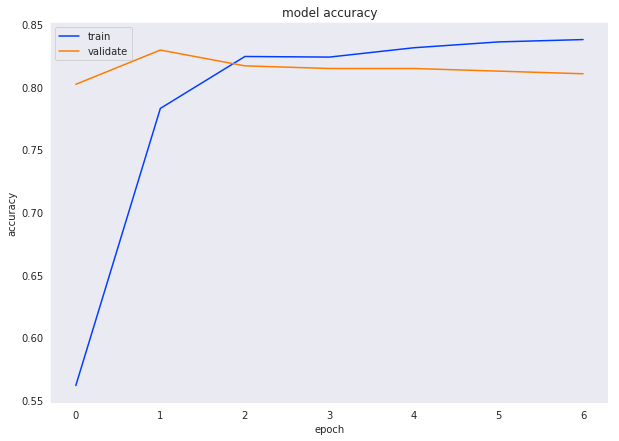

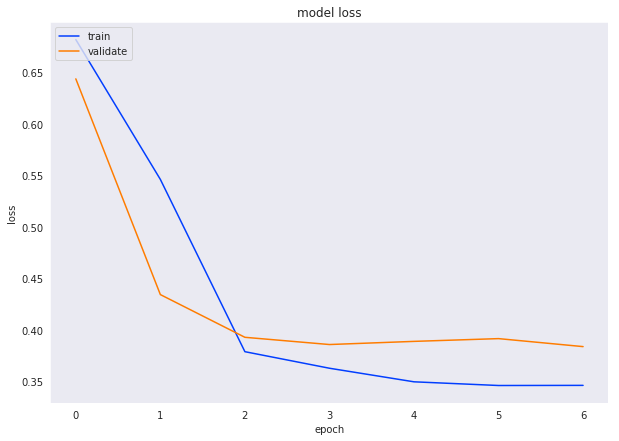

In [39]:
# summarize history for accuracy
plt.figure(figsize=(10,7))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')
plt.show()

# summarize history for loss
plt.figure(figsize=(10,7))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')
plt.show()

In [40]:
# Predicting the Test set results
y_pred = model.predict(X_test)
# conver the probability to actual prediction grade label
y_predict = [ np.argmax(a) for a in y_pred ]

y_test = np.asarray(y_test)
y_predict = np.asarray(y_predict)

In [41]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score, accuracy_score

print("precision = ", precision_score(y_test, y_predict, average='macro'))

print("recall = ", recall_score(y_test, y_predict, average='macro'))  

print("f1_score = ", f1_score(y_test, y_predict, average='macro')  )

print("accuracy = ", accuracy_score(y_test, y_predict)  )

precision =  0.8177923387096775
recall =  0.7886904761904762
f1_score =  0.7964285714285714
accuracy =  0.8105263157894737


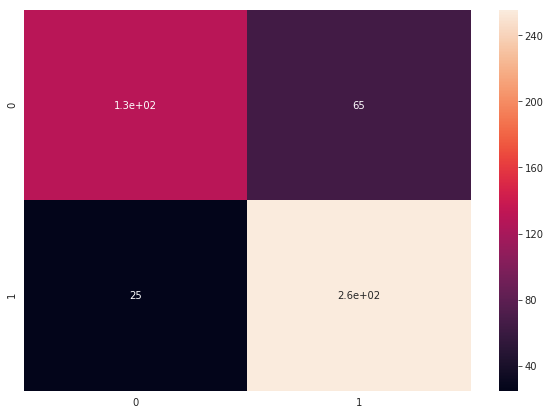

In [42]:
# heatmap visualization of the model performance
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

df_cm = pd.DataFrame(confusion_matrix(y_test, y_predict), index = [i for i in "01"],
                  columns = [i for i in "01"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)